# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import math

# Read Dataset on Credit Card Fraud Detection

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
df = data[ :1000]
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,751.0,-0.654892,0.608319,1.585102,-3.009429,0.037593,-1.954023,1.335977,-0.612858,0.690254,...,-0.078527,-0.064194,-0.107350,0.961776,-0.067760,-0.549465,-0.232588,-0.108261,3.90,0
996,752.0,-2.101171,-0.227365,1.624668,-0.291123,1.902446,-1.483921,-0.275117,0.085964,-0.563098,...,-0.313782,-0.804784,-0.474101,0.008102,0.259725,0.032376,0.323580,0.034622,1.78,0
997,753.0,-1.248163,0.315246,3.708935,0.687280,-0.873071,1.091287,0.297707,-0.633135,1.102317,...,-0.824013,0.057907,-0.282351,0.630774,0.283506,-0.204264,0.097555,-0.670480,30.00,0
998,755.0,1.374134,-1.767210,-0.433352,-2.229552,0.331135,3.924775,-2.049947,1.001403,-1.183310,...,-0.252942,-0.461534,-0.030890,0.997119,0.384299,-0.187538,0.068817,0.038009,82.37,0


# Design Membership functions for the input and output variables

0 755


C:\Users\S-rbh\Anaconda3\envs\tensorflow\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


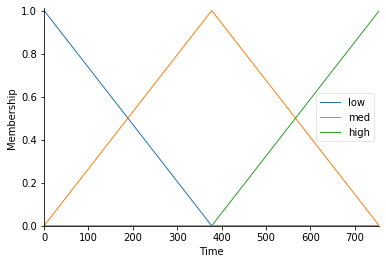

In [5]:
x=math.floor(min(np.array(df['Time'])))
y=math.ceil(max(np.array(df['Time'])))
z1=(abs(x)+abs(y))/2
z=x+z1
time = ctrl.Antecedent(np.arange(x, y, 1), 'Time')

time['low'] = fuzz.trimf(time.universe, [x, x, z])
time['med'] = fuzz.trimf(time.universe, [x, z, y])
time['high']  = fuzz.trimf(time.universe, [z, y, y])

print(x,y)
time.view()

-6.09324780457494 1.6853138153945602


C:\Users\S-rbh\Anaconda3\envs\tensorflow\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


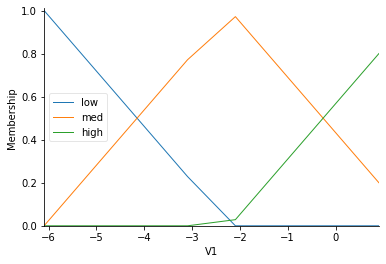

In [6]:
x=min(np.array(df['V1']))
y=max(np.array(df['V1']))
z1=(abs(x)+abs(y))/2
z=x+z1
v1 = ctrl.Antecedent(np.arange(x, y, 1), 'V1')

v1['low'] = fuzz.trimf(v1.universe, [x, x, z])
v1['med'] = fuzz.trimf(v1.universe, [x, z, y])
v1['high']  = fuzz.trimf(v1.universe, [z, y, y])

print(x,y)
v1.view()

-12.1142127363483 5.26737615027487


C:\Users\S-rbh\Anaconda3\envs\tensorflow\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


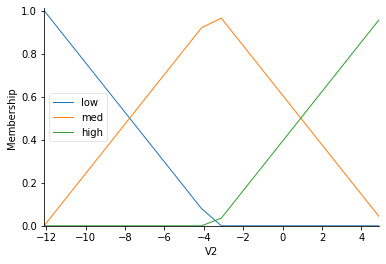

In [7]:
x=min(np.array(df['V2']))
y=max(np.array(df['V2']))
z1=(abs(x)+abs(y))/2
z=x+z1
v2 = ctrl.Antecedent(np.arange(x, y, 1), 'V2')

v2['low'] = fuzz.trimf(v2.universe, [x, x, z])
v2['med'] = fuzz.trimf(v2.universe, [x, z, y])
v2['high']  = fuzz.trimf(v2.universe, [z, y, y])

print(x,y)
v2.view()

-5.69497318304808 4.01756141829354


C:\Users\S-rbh\Anaconda3\envs\tensorflow\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


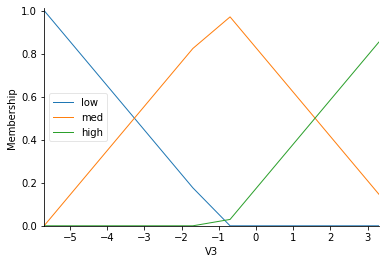

In [8]:
x=min(np.array(df['V3']))
y=max(np.array(df['V3']))
z1=(abs(x)+abs(y))/2
z=x+z1
v3 = ctrl.Antecedent(np.arange(x, y, 1), 'V3')

v3['low'] = fuzz.trimf(v3.universe, [x, x, z])
v3['med'] = fuzz.trimf(v3.universe, [x, z, y])
v3['high']  = fuzz.trimf(v3.universe, [z, y, y])

print(x,y)
v3.view()

-4.65754503367186 4.86112928317014


C:\Users\S-rbh\Anaconda3\envs\tensorflow\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


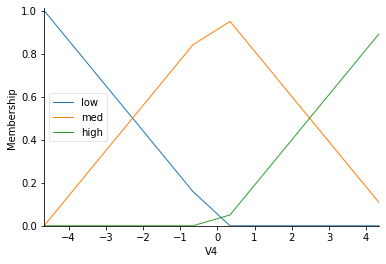

In [9]:
x=min(np.array(df['V4']))
y=max(np.array(df['V4']))
z1=(abs(x)+abs(y))/2
z=x+z1
v4 = ctrl.Antecedent(np.arange(x, y, 1), 'V4')

v4['low'] = fuzz.trimf(v4.universe, [x, x, z])
v4['med'] = fuzz.trimf(v4.universe, [x, z, y])
v4['high']  = fuzz.trimf(v4.universe, [z, y, y])

print(x,y)
v4.view()

-6.631950832131209 7.67254396636689


C:\Users\S-rbh\Anaconda3\envs\tensorflow\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


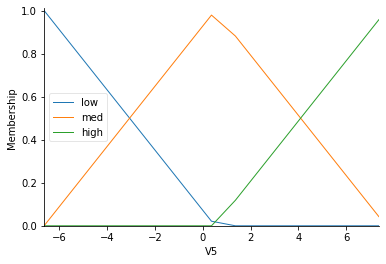

In [10]:
x=min(np.array(df['V5']))
y=max(np.array(df['V5']))
z1=(abs(x)+abs(y))/2
z=x+z1
v5 = ctrl.Antecedent(np.arange(x, y, 1), 'V5')

v5['low'] = fuzz.trimf(v5.universe, [x, x, z])
v5['med'] = fuzz.trimf(v5.universe, [x, z, y])
v5['high']  = fuzz.trimf(v5.universe, [z, y, y])

print(x,y)
v5.view()

-3.4984471745549905 5.122102581422969


C:\Users\S-rbh\Anaconda3\envs\tensorflow\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


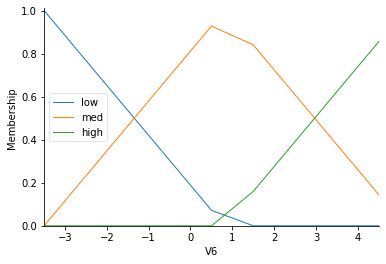

In [11]:
x=min(np.array(df['V6']))
y=max(np.array(df['V6']))
z1=(abs(x)+abs(y))/2
z=x+z1
v6 = ctrl.Antecedent(np.arange(x, y, 1), 'V6')

v6['low'] = fuzz.trimf(v6.universe, [x, x, z])
v6['med'] = fuzz.trimf(v6.universe, [x, z, y])
v6['high']  = fuzz.trimf(v6.universe, [z, y, y])

print(x,y)
v6.view()

-4.92556804335746 4.80842581669219


C:\Users\S-rbh\Anaconda3\envs\tensorflow\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


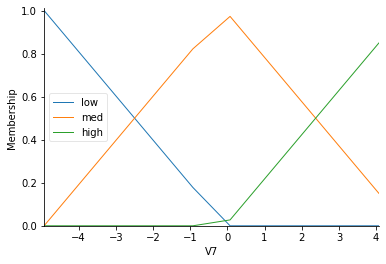

In [12]:
x=min(np.array(df['V7']))
y=max(np.array(df['V7']))
z1=(abs(x)+abs(y))/2
z=x+z1
v7 = ctrl.Antecedent(np.arange(x, y, 1), 'V7')

v7['low'] = fuzz.trimf(v7.universe, [x, x, z])
v7['med'] = fuzz.trimf(v7.universe, [x, z, y])
v7['high']  = fuzz.trimf(v7.universe, [z, y, y])

print(x,y)
v7.view()

-7.49465760797684 3.8776615802817003


C:\Users\S-rbh\Anaconda3\envs\tensorflow\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


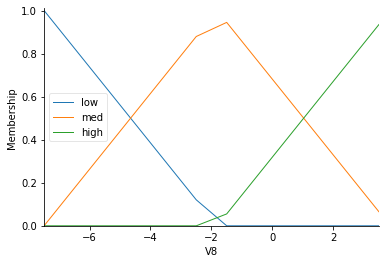

In [13]:
x=min(np.array(df['V8']))
y=max(np.array(df['V8']))
z1=(abs(x)+abs(y))/2
z=x+z1
v8 = ctrl.Antecedent(np.arange(x, y, 1), 'V8')

v8['low'] = fuzz.trimf(v8.universe, [x, x, z])
v8['med'] = fuzz.trimf(v8.universe, [x, z, y])
v8['high']  = fuzz.trimf(v8.universe, [z, y, y])

print(x,y)
v8.view()

-2.98062444526111 5.45927435788742


C:\Users\S-rbh\Anaconda3\envs\tensorflow\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


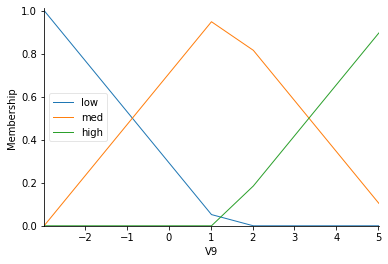

In [14]:
x=min(np.array(df['V9']))
y=max(np.array(df['V9']))
z1=(abs(x)+abs(y))/2
z=x+z1
v9 = ctrl.Antecedent(np.arange(x, y, 1), 'V9')

v9['low'] = fuzz.trimf(v9.universe, [x, x, z])
v9['med'] = fuzz.trimf(v9.universe, [x, z, y])
v9['high']  = fuzz.trimf(v9.universe, [z, y, y])

print(x,y)
v9.view()

-2.7722721446591496 8.82175647014444


C:\Users\S-rbh\Anaconda3\envs\tensorflow\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


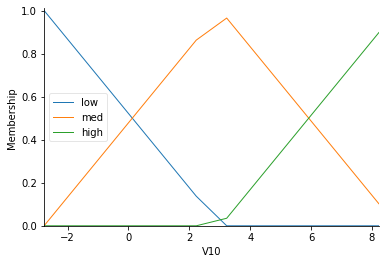

In [15]:
x=min(np.array(df['V10']))
y=max(np.array(df['V10']))
z1=(abs(x)+abs(y))/2
z=x+z1
v10 = ctrl.Antecedent(np.arange(x, y, 1), 'V10')

v10['low'] = fuzz.trimf(v10.universe, [x, x, z])
v10['med'] = fuzz.trimf(v10.universe, [x, z, y])
v10['high']  = fuzz.trimf(v10.universe, [z, y, y])

print(x,y)
v10.view()

-2.4371572475597403 3.20203320709635


C:\Users\S-rbh\Anaconda3\envs\tensorflow\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


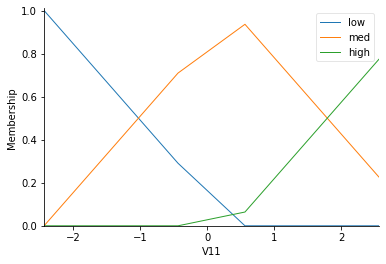

In [16]:
x=min(np.array(df['V11']))
y=max(np.array(df['V11']))
z1=(abs(x)+abs(y))/2
z=x+z1
v11 = ctrl.Antecedent(np.arange(x, y, 1), 'V11')

v11['low'] = fuzz.trimf(v11.universe, [x, x, z])
v11['med'] = fuzz.trimf(v11.universe, [x, z, y])
v11['high']  = fuzz.trimf(v11.universe, [z, y, y])

print(x,y)
v11.view()

-2.89990738849473 2.1520551159024297


C:\Users\S-rbh\Anaconda3\envs\tensorflow\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


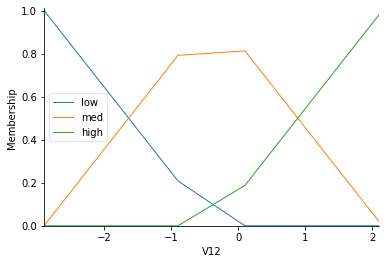

In [17]:
x=min(np.array(df['V12']))
y=max(np.array(df['V12']))
z1=(abs(x)+abs(y))/2
z=x+z1
v12 = ctrl.Antecedent(np.arange(x, y, 1), 'V12')

v12['low'] = fuzz.trimf(v12.universe, [x, x, z])
v12['med'] = fuzz.trimf(v12.universe, [x, z, y])
v12['high']  = fuzz.trimf(v12.universe, [z, y, y])

print(x,y)
v12.view()

-2.65660059118472 2.14271002258858


C:\Users\S-rbh\Anaconda3\envs\tensorflow\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


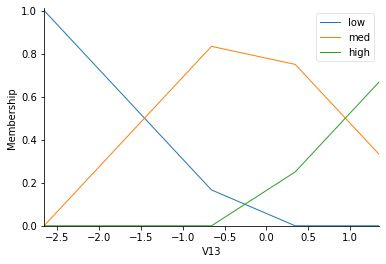

In [18]:
x=min(np.array(df['V13']))
y=max(np.array(df['V13']))
z1=(abs(x)+abs(y))/2
z=x+z1
v13 = ctrl.Antecedent(np.arange(x, y, 1), 'V13')

v13['low'] = fuzz.trimf(v13.universe, [x, x, z])
v13['med'] = fuzz.trimf(v13.universe, [x, z, y])
v13['high']  = fuzz.trimf(v13.universe, [z, y, y])

print(x,y)
v13.view()

-6.57678855343433 1.9772964318236599


C:\Users\S-rbh\Anaconda3\envs\tensorflow\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


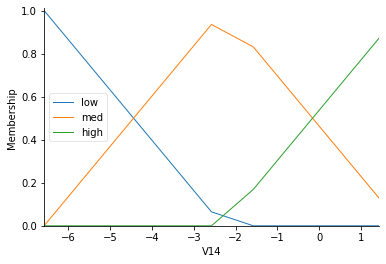

In [19]:
x=min(np.array(df['V14']))
y=max(np.array(df['V14']))
z1=(abs(x)+abs(y))/2
z=x+z1
v14 = ctrl.Antecedent(np.arange(x, y, 1), 'V14')

v14['low'] = fuzz.trimf(v14.universe, [x, x, z])
v14['med'] = fuzz.trimf(v14.universe, [x, z, y])
v14['high']  = fuzz.trimf(v14.universe, [z, y, y])

print(x,y)
v14.view()

-3.61805982526533 2.70368469077415


C:\Users\S-rbh\Anaconda3\envs\tensorflow\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


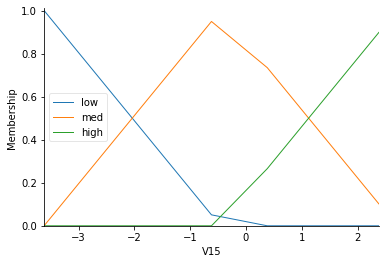

In [20]:
x=min(np.array(df['V15']))
y=max(np.array(df['V15']))
z1=(abs(x)+abs(y))/2
z=x+z1
v15 = ctrl.Antecedent(np.arange(x, y, 1), 'V15')

v15['low'] = fuzz.trimf(v15.universe, [x, x, z])
v15['med'] = fuzz.trimf(v15.universe, [x, z, y])
v15['high']  = fuzz.trimf(v15.universe, [z, y, y])

print(x,y)
v15.view()

-3.5763608776993197 1.89874756257003


C:\Users\S-rbh\Anaconda3\envs\tensorflow\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


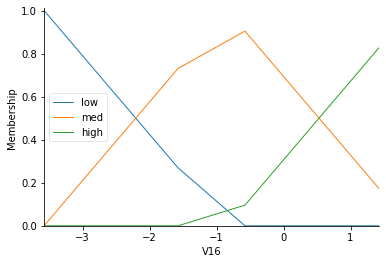

In [21]:
x=min(np.array(df['V16']))
y=max(np.array(df['V16']))
z1=(abs(x)+abs(y))/2
z=x+z1
v16 = ctrl.Antecedent(np.arange(x, y, 1), 'V16')

v16['low'] = fuzz.trimf(v16.universe, [x, x, z])
v16['med'] = fuzz.trimf(v16.universe, [x, z, y])
v16['high']  = fuzz.trimf(v16.universe, [z, y, y])

print(x,y)
v16.view()

-5.4000143732730495 3.98628883313929


C:\Users\S-rbh\Anaconda3\envs\tensorflow\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


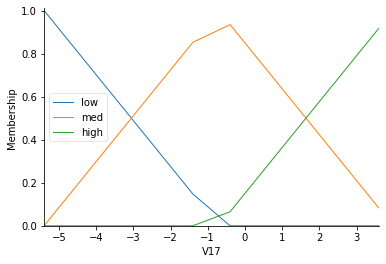

In [22]:
x=min(np.array(df['V17']))
y=max(np.array(df['V17']))
z1=(abs(x)+abs(y))/2
z=x+z1
v17 = ctrl.Antecedent(np.arange(x, y, 1), 'V17')

v17['low'] = fuzz.trimf(v17.universe, [x, x, z])
v17['med'] = fuzz.trimf(v17.universe, [x, z, y])
v17['high']  = fuzz.trimf(v17.universe, [z, y, y])

print(x,y)
v17.view()

-2.8300352286731805 2.68976185567707


C:\Users\S-rbh\Anaconda3\envs\tensorflow\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


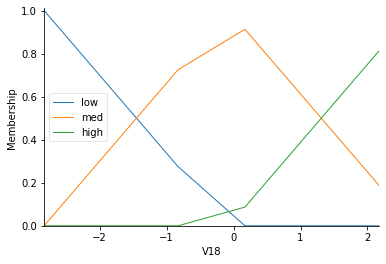

In [23]:
x=min(np.array(df['V18']))
y=max(np.array(df['V18']))
z1=(abs(x)+abs(y))/2
z=x+z1
v18 = ctrl.Antecedent(np.arange(x, y, 1), 'V18')

v18['low'] = fuzz.trimf(v18.universe, [x, x, z])
v18['med'] = fuzz.trimf(v18.universe, [x, z, y])
v18['high']  = fuzz.trimf(v18.universe, [z, y, y])

print(x,y)
v18.view()

-3.4639932317308397 2.86270605791208


C:\Users\S-rbh\Anaconda3\envs\tensorflow\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


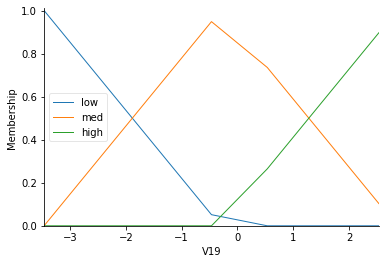

In [24]:
x=min(np.array(df['V19']))
y=max(np.array(df['V19']))
z1=(abs(x)+abs(y))/2
z=x+z1
v19 = ctrl.Antecedent(np.arange(x, y, 1), 'V19')

v19['low'] = fuzz.trimf(v19.universe, [x, x, z])
v19['med'] = fuzz.trimf(v19.universe, [x, z, y])
v19['high']  = fuzz.trimf(v19.universe, [z, y, y])

print(x,y)
v19.view()

-2.53894148648605 7.74422243482949


C:\Users\S-rbh\Anaconda3\envs\tensorflow\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


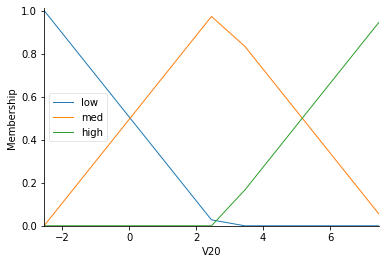

In [25]:
x=min(np.array(df['V20']))
y=max(np.array(df['V20']))
z1=(abs(x)+abs(y))/2
z=x+z1
v20 = ctrl.Antecedent(np.arange(x, y, 1), 'V20')

v20['low'] = fuzz.trimf(v20.universe, [x, x, z])
v20['med'] = fuzz.trimf(v20.universe, [x, z, y])
v20['high']  = fuzz.trimf(v20.universe, [z, y, y])

print(x,y)
v20.view()

-4.1346076577038 5.2734200475624595


C:\Users\S-rbh\Anaconda3\envs\tensorflow\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


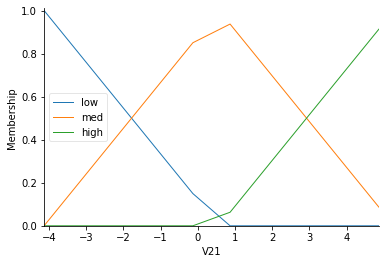

In [26]:
x=min(np.array(df['V21']))
y=max(np.array(df['V21']))
z1=(abs(x)+abs(y))/2
z=x+z1
v21 = ctrl.Antecedent(np.arange(x, y, 1), 'V21')

v21['low'] = fuzz.trimf(v21.universe, [x, x, z])
v21['med'] = fuzz.trimf(v21.universe, [x, z, y])
v21['high']  = fuzz.trimf(v21.universe, [z, y, y])

print(x,y)
v21.view()

-2.7769233924397403 1.57474998798699


C:\Users\S-rbh\Anaconda3\envs\tensorflow\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


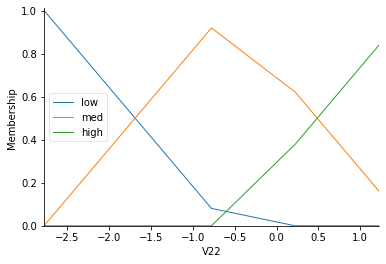

In [27]:
x=min(np.array(df['V22']))
y=max(np.array(df['V22']))
z1=(abs(x)+abs(y))/2
z=x+z1
v22 = ctrl.Antecedent(np.arange(x, y, 1), 'V22')

v22['low'] = fuzz.trimf(v22.universe, [x, x, z])
v22['med'] = fuzz.trimf(v22.universe, [x, z, y])
v22['high']  = fuzz.trimf(v22.universe, [z, y, y])

print(x,y)
v22.view()

-3.55338061765328 3.15041349854235


C:\Users\S-rbh\Anaconda3\envs\tensorflow\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


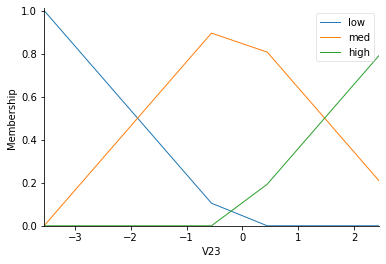

In [28]:
x=min(np.array(df['V23']))
y=max(np.array(df['V23']))
z1=(abs(x)+abs(y))/2
z=x+z1
v23 = ctrl.Antecedent(np.arange(x, y, 1), 'V23')

v23['low'] = fuzz.trimf(v23.universe, [x, x, z])
v23['med'] = fuzz.trimf(v23.universe, [x, z, y])
v23['high']  = fuzz.trimf(v23.universe, [z, y, y])

print(x,y)
v23.view()

-1.8672081918347099 1.21527882183022


C:\Users\S-rbh\Anaconda3\envs\tensorflow\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


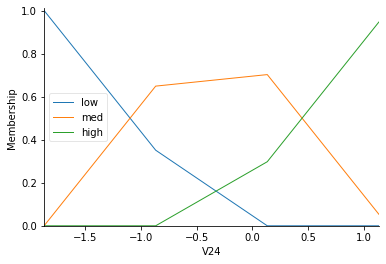

In [29]:
x=min(np.array(df['V24']))
y=max(np.array(df['V24']))
z1=(abs(x)+abs(y))/2
z=x+z1
v24 = ctrl.Antecedent(np.arange(x, y, 1), 'V24')

v24['low'] = fuzz.trimf(v24.universe, [x, x, z])
v24['med'] = fuzz.trimf(v24.universe, [x, z, y])
v24['high']  = fuzz.trimf(v24.universe, [z, y, y])

print(x,y)
v24.view()

-1.5442093451593302 1.20682011815992


C:\Users\S-rbh\Anaconda3\envs\tensorflow\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


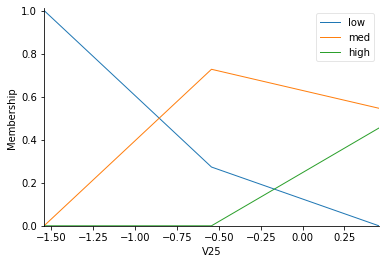

In [30]:
x=min(np.array(df['V25']))
y=max(np.array(df['V25']))
z1=(abs(x)+abs(y))/2
z=x+z1
v25 = ctrl.Antecedent(np.arange(x, y, 1), 'V25')

v25['low'] = fuzz.trimf(v25.universe, [x, x, z])
v25['med'] = fuzz.trimf(v25.universe, [x, z, y])
v25['high']  = fuzz.trimf(v25.universe, [z, y, y])

print(x,y)
v25.view()

-1.24392415371264 3.08744427401749


C:\Users\S-rbh\Anaconda3\envs\tensorflow\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


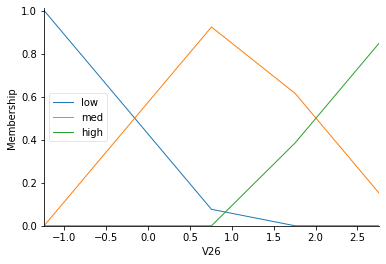

In [31]:
x=min(np.array(df['V26']))
y=max(np.array(df['V26']))
z1=(abs(x)+abs(y))/2
z=x+z1
v26 = ctrl.Antecedent(np.arange(x, y, 1), 'V26')

v26['low'] = fuzz.trimf(v26.universe, [x, x, z])
v26['med'] = fuzz.trimf(v26.universe, [x, z, y])
v26['high']  = fuzz.trimf(v26.universe, [z, y, y])

print(x,y)
v26.view()

-3.52528081576643 2.49050305486782


C:\Users\S-rbh\Anaconda3\envs\tensorflow\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


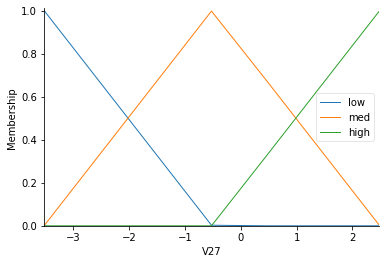

In [32]:
x=min(np.array(df['V27']))
y=max(np.array(df['V27']))
z1=(abs(x)+abs(y))/2
z=x+z1
v27 = ctrl.Antecedent(np.arange(x, y, 1), 'V27')

v27['low'] = fuzz.trimf(v27.universe, [x, x, z])
v27['med'] = fuzz.trimf(v27.universe, [x, z, y])
v27['high']  = fuzz.trimf(v27.universe, [z, y, y])

print(x,y)
v27.view()

-2.7356227618839197 1.5753797992662502


C:\Users\S-rbh\Anaconda3\envs\tensorflow\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


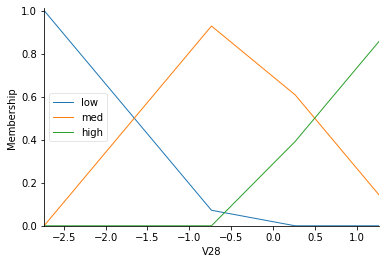

In [33]:
x=min(np.array(df['V28']))
y=max(np.array(df['V28']))
z1=(abs(x)+abs(y))/2
z=x+z1
v28 = ctrl.Antecedent(np.arange(x, y, 1), 'V28')

v28['low'] = fuzz.trimf(v28.universe, [x, x, z])
v28['med'] = fuzz.trimf(v28.universe, [x, z, y])
v28['high']  = fuzz.trimf(v28.universe, [z, y, y])

print(x,y)
v28.view()

0 3829


C:\Users\S-rbh\Anaconda3\envs\tensorflow\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


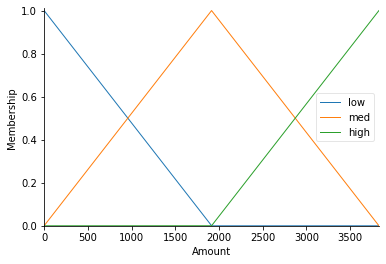

In [34]:
x=math.floor(min(np.array(df['Amount'])))
y=math.ceil(max(np.array(df['Amount'])))
z1=(abs(x)+abs(y))/2
z=x+z1
amount = ctrl.Antecedent(np.arange(x, y, 1), 'Amount')

amount['low'] = fuzz.trimf(amount.universe, [x, x, z])
amount['med'] = fuzz.trimf(amount.universe, [x, z, y])
amount['high']  = fuzz.trimf(amount.universe, [z, y, y])

print(x,y)
amount.view()

0 1


C:\Users\S-rbh\Anaconda3\envs\tensorflow\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


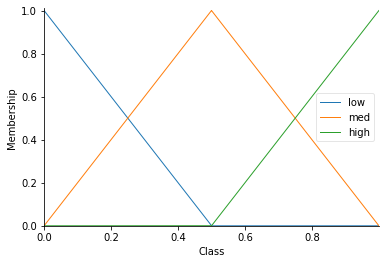

In [35]:
x=min(np.array(df['Class']))
y=max(np.array(df['Class']))
z1=(abs(x)+abs(y))/2
z=x+z1
clas = ctrl.Consequent(np.arange(x, y,0.0001), 'Class')

clas['low'] = fuzz.trimf(clas.universe, [x, x, z])
clas['med'] = fuzz.trimf(clas.universe, [x, z, y])
clas['high']  = fuzz.trimf(clas.universe, [z, y, y])

print(x,y)
clas.view()

# Define the rule base system on basis of our own knowledge

In [36]:
reg1 = ctrl.Rule(time['low'] & (v1['low'] | v1['med']) & (v2['low'] | v2['med']) & (v3['low'] | v3['med']) & (v4['low'] | v4['med']) & (v5['low'] | v5['med']) & (v6['low'] | v6['med']) & (v7['low'] | v7['med']) & (v8['low'] | v8['med']) & (v9['low'] | v9['med']) & (v10['low'] | v10['med']) & (v11['low'] | v11['med']) & (v12['low'] | v12['med']) & (v13['low'] | v13['med']) & (v14['low'] | v14['med']) & (v15['low'] | v15['med']) & (v16['low'] | v16['med']) & (v17['low'] | v17['med']) & (v18['low'] | v18['med']) & (v19['low'] | v19['med']) & (v20['low'] | v20['med']) & (v21['low'] | v21['med']) & (v22['low'] | v22['med']) & (v23['low'] | v23['med']) & (v24['low'] | v24['med']) & (v25['low'] | v25['med']) & (v26['low'] | v26['med']) & (v27['low'] | v27['med']) & (v28['low'] | v28['med']) & amount['low'] , clas['low'])

In [37]:
reg2 = ctrl.Rule(time['med'] & (v1['med'] | v1['high']) & (v2['med'] | v2['high']) & (v3['med'] | v3['high']) & (v4['med'] | v4['high']) & (v5['med'] | v5['high']) & (v6['med'] | v6['high']) & (v7['med'] | v7['high']) & (v8['med'] | v8['high']) & (v9['med'] | v9['high']) & (v10['med'] | v10['high']) & (v11['med'] | v11['high']) & (v12['med'] | v12['high']) & (v13['med'] | v13['high']) & (v14['med'] | v14['high']) & (v15['med'] | v15['high']) & (v16['med'] | v16['high']) & (v17['med'] | v17['high']) & (v18['med'] | v18['high']) & (v19['med'] | v19['high']) & (v20['med'] | v20['high']) & (v21['med'] | v21['high']) & (v22['med'] | v22['high']) & (v23['med'] | v23['high']) & (v24['med'] | v24['high']) & (v25['med'] | v25['high']) & (v26['med'] | v26['high']) & (v27['med'] | v27['high']) & (v28['med'] | v28['high']) & amount['med'] , clas['med'])

In [38]:
reg3 = ctrl.Rule(time['high'] & (v1['high'] | v1['high']) & (v2['high'] | v2['high']) & (v3['high'] | v3['high']) & (v4['high'] | v4['high']) & (v5['high'] | v5['high']) & (v6['high'] | v6['high']) & (v7['high'] | v7['high']) & (v8['high'] | v8['high']) & (v9['high'] | v9['high']) & (v10['high'] | v10['high']) & (v11['high'] | v11['high']) & (v12['high'] | v12['high']) & (v13['high'] | v13['high']) & (v14['high'] | v14['high']) & (v15['high'] | v15['high']) & (v16['high'] | v16['high']) & (v17['high'] | v17['high']) & (v18['high'] | v18['high']) & (v19['high'] | v19['high']) & (v20['high'] | v20['high']) & (v21['high'] | v21['high']) & (v22['high'] | v22['high']) & (v23['high'] | v23['high']) & (v24['high'] | v24['high']) & (v25['high'] | v25['high']) & (v26['high'] | v26['high']) & (v27['high'] | v27['high']) & (v28['high'] | v28['high']) & amount['high'] , clas['high'])

In [39]:
clas_ctrl = ctrl.ControlSystem([reg1, reg2, reg3])
clas_sim = ctrl.ControlSystemSimulation(clas_ctrl)

# Calculate the output for the given inputs

In [40]:
clas_sim.input['Time'] = 400
clas_sim.input['V1'] = -3.92
clas_sim.input['V2'] = -6.11
clas_sim.input['V3'] = 0.23
clas_sim.input['V4'] = -4.01
clas_sim.input['V5'] = -2.21
clas_sim.input['V6'] = 1.89
clas_sim.input['V7'] = 0.1
clas_sim.input['V8'] = -6.49
clas_sim.input['V9'] = 1.35
clas_sim.input['V10'] = 2.349
clas_sim.input['V11'] = -1.74
clas_sim.input['V12'] = -2.02
clas_sim.input['V13'] = -1.69
clas_sim.input['V14'] = -4.2
clas_sim.input['V15'] = -1.48
clas_sim.input['V16'] = -2.5
clas_sim.input['V17'] = -4.48
clas_sim.input['V18'] = -1.33
clas_sim.input['V19'] = -2.63
clas_sim.input['V20'] = 2.74
clas_sim.input['V21'] = -1.83
clas_sim.input['V22'] = -1.97
clas_sim.input['V23'] = -3.5
clas_sim.input['V24'] = 0.687
clas_sim.input['V25'] = -1.52
clas_sim.input['V26'] = 0.23
clas_sim.input['V27'] = -2.5
clas_sim.input['V28'] = -1.735
clas_sim.input['Amount'] = 1000

# Calculate
clas_sim.compute()
clas_sim.output

OrderedDict([('Class', 0.49999968355989055)])

C:\Users\S-rbh\Anaconda3\envs\tensorflow\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


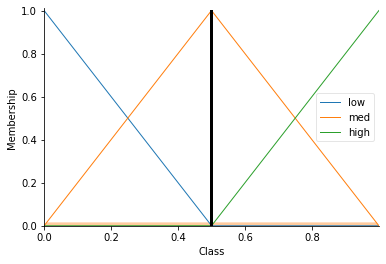

In [41]:
clas.view(sim=clas_sim)

In [46]:
def ic(clas):
    clas_sim.input['Time'] = 400
    clas_sim.input['V1'] = -3.92
    clas_sim.input['V2'] = -6.11
    clas_sim.input['V3'] = 0.23
    clas_sim.input['V4'] = -4.01
    clas_sim.input['V5'] = -2.21
    clas_sim.input['V6'] = 1.89
    clas_sim.input['V7'] = 0.1
    clas_sim.input['V8'] = -6.49
    clas_sim.input['V9'] = 1.35
    clas_sim.input['V10'] = 2.349
    clas_sim.input['V11'] = -1.74
    clas_sim.input['V12'] = -2.02
    clas_sim.input['V13'] = -1.69
    clas_sim.input['V14'] = -4.2
    clas_sim.input['V15'] = -1.48
    clas_sim.input['V16'] = -2.5
    clas_sim.input['V17'] = -4.48
    clas_sim.input['V18'] = -1.33
    clas_sim.input['V19'] = -2.63
    clas_sim.input['V20'] = 2.74
    clas_sim.input['V21'] = -1.83
    clas_sim.input['V22'] = -1.97
    clas_sim.input['V23'] = -3.5
    clas_sim.input['V24'] = 0.687
    clas_sim.input['V25'] = -1.52
    clas_sim.input['V26'] = 0.23
    clas_sim.input['V27'] = -2.5
    clas_sim.input['V28'] = -1.735
    clas_sim.input['Amount'] = 1000
    
    clas_sim.compute()
    return(clas_sim.output['Class'])

In [49]:
if(ic('Class')<0.5):
    print('Class: 0 - Non-Fraud')
else:
    print('Class: 1 - Fraud')

Class: 0 - Non-Fraud
